# Using PyTorch to build, train, and test convolutional neural networks

## Agenda
*  Tensors
*   Basic operations
  *    Convolution
  *    Activation
  *    Pooling
  *    Batch normalization
  *    Skip conection
*   Building a convolutional neural network
*   Training
  *  Loading data
  *  Loss function
  *  Optimizer
*   Testing
*   Visualizing activations






### Tensors

A tensor is a **multidimensional array**. We can use it to represent **multi-channel (multiband) images**, as well as **kernels weights**. Let's see how we can create a tensor from a image.

In [0]:
#import package to manipulate images
from skimage import io

In [0]:
#load image from internet
image = io.imread("https://upload.wikimedia.org/wikipedia/commons/b/b9/Estornino_de_El_Cabo_%28Lamprotornis_nitens%29%2C_parque_nacional_Kruger%2C_Sud%C3%A1frica%2C_2018-07-25%2C_DD_56.jpg")

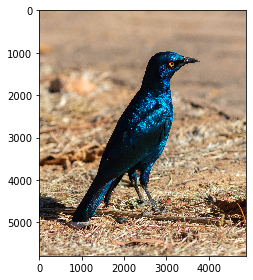

In [0]:
#plot image
io.imshow(image)

Our image is already a multidimensional array.

In [0]:
#image size
image.shape

(5792, 4881, 3)

Now we can create a pytorch tensor from this numpy array.

In [0]:
#import pytorch
import torch

In [0]:
#create a tensor form a numpy array
tensor = torch.tensor(image)

In [0]:
#tensor content
tensor

tensor([[[194, 161, 130],
         [200, 167, 136],
         [198, 165, 134],
         ...,
         [182, 158, 134],
         [174, 150, 126],
         [176, 151, 129]],

        [[197, 164, 133],
         [197, 164, 133],
         [198, 165, 134],
         ...,
         [177, 153, 129],
         [174, 150, 126],
         [176, 151, 129]],

        [[199, 166, 135],
         [195, 162, 131],
         [198, 165, 134],
         ...,
         [172, 148, 124],
         [175, 151, 127],
         [177, 152, 130]],

        ...,

        [[179, 128, 101],
         [182, 131, 104],
         [187, 134, 103],
         ...,
         [205, 160, 101],
         [202, 157,  98],
         [206, 161, 102]],

        [[171, 119,  95],
         [176, 125,  98],
         [185, 132, 101],
         ...,
         [209, 164, 105],
         [207, 162, 103],
         [212, 168, 107]],

        [[178, 126, 102],
         [175, 124,  97],
         [181, 128,  97],
         ...,
         [208, 166, 106],
        

In [0]:
#tensor size
tensor.size()

torch.Size([5792, 4881, 3])

A 3-band image in 2D is then a 3 dimensional tensor. First and second dimensions correspond to the horizontal and vertical image's sizes, and the third one corresponds to the number of channels (bands).

To use pytorch packages, we usually need the first dimension to represent the number of channels.

In [0]:
#transpose tensor so it matches pytorch standard
tensor = tensor.transpose(1, 2).transpose(0, 1)

In [0]:
#tensor size
tensor.size()

torch.Size([3, 5792, 4881])

Let's say we have a kernel $K = \begin{bmatrix}
-1 & 0 & 1 \\
-2 & 0 & 2 \\
-1 & 0 & 1
\end{bmatrix}$. We can represent it as a pytorch tensor as follows.

In [0]:
#defining kernek
kernel = torch.tensor([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

In [0]:
kernel

tensor([[-1,  0,  1],
        [-2,  0,  2],
        [-1,  0,  1]])

## Building a convolutional neural network

PyTorch has a module called `nn` that provides a lot of useful tools to build neural networks. This module defines the most used operations, such as convolution, pooling, activation, and many others. We are going to see how we can use each operation of a basic convolutional neural network using module `nn`. These are the operations that we are going to see: 

*   Convolution
*   Activation
*   Pooling
*   Batch normalization
*   Linear transformation + activation (flattening + a fully-connected layer)

After, we are going to build the convolutional neural network shown below for MNIST.

![](https://drive.google.com/uc?id=1MrJ2MzsVIf8aWICkrlQoGwBNE3RQLjQi)



In [0]:
#import module nn
import torch.nn as nn

### Convolutional layer

To define a convolutional layer, we have to give the number of input channels, the number of output channels and the kernel sizes. The number of output channels is the number of kernels.

In [0]:
#define a convolution with 3 kernels of size 3x3
conv = nn.Conv2d(in_channels=2, out_channels=3,
                 kernel_size=(3, 3), padding=1, bias=True)

The convolutional layer weights are a tensor $K_{N, M, P, Q}$ such that,
$N$ is the number of kernels, $M$ is the number of input channels, $P$ and $Q$ are the input dimensions. Below, we can see the size of our convolutional layer weights.



In [0]:
#convolutional layer weight size
conv.weight.data.size()

torch.Size([3, 2, 3, 3])

The input of a convolutional layer is a tensor $I_{B, P, Q}$ such that $B$ is the batch size, and $P$ and $Q$ are the input dimensions. Below we create some random input to test our convolutional layer.

In [0]:
#creating a random input
x = torch.rand(1, 2, 4, 4)
print(x.size())

torch.Size([1, 2, 4, 4])


In [0]:
#apply the convolution to x
y_conv = conv(x)

In [0]:
#the result of the convolution
y_conv

tensor([[[[-0.3149, -0.0532, -0.0088, -0.5141],
          [ 0.0496, -0.2526, -0.2457, -0.2702],
          [-0.1594, -0.0305, -0.4611, -0.4151],
          [ 0.0785, -0.0774, -0.0917, -0.2362]],

         [[ 0.0164,  0.1300,  0.2216,  0.0038],
          [ 0.3032,  0.0731, -0.1117, -0.0801],
          [ 0.1121, -0.1135, -0.0603, -0.2874],
          [ 0.1076, -0.5527, -0.2224, -0.3950]],

         [[ 0.1573,  0.0902,  0.0914,  0.1246],
          [ 0.3979, -0.2064,  0.1858,  0.1763],
          [ 0.1474,  0.0248,  0.3393, -0.1389],
          [-0.1648, -0.2754,  0.0067, -0.3000]]]],
       grad_fn=<MkldnnConvolutionBackward>)

In [0]:
print(y_conv.size())

torch.Size([1, 3, 4, 4])


We can set the kernel weights as we want. Below, we set weights as random.

In [0]:
#initializing weights
conv.weight.data = torch.rand(3, 2, 3, 3, requires_grad=True)
conv.bias.data = torch.rand(3, requires_grad=True)

In [0]:
#apply the convolution with new weights
y_conv = conv(x)


### Activation

Now we define an activation layer by using the relu function.

In [0]:
#defining relu function
relu = nn.ReLU()

In [0]:
#applying the relu function to output of a convolution
y_relu = relu(y_conv)

In [0]:
#output of the relu function
y_relu

tensor([[[[1.4207, 2.2326, 2.7051, 2.2598],
          [2.6245, 5.1015, 4.7249, 2.9254],
          [3.4706, 5.8992, 5.4121, 3.4016],
          [3.2155, 4.8277, 3.3669, 2.1022]],

         [[1.7899, 2.9164, 2.6391, 2.9197],
          [3.1092, 5.2670, 4.2167, 3.8310],
          [3.4781, 6.0206, 5.4398, 4.5979],
          [3.2425, 4.6830, 3.7934, 3.1772]],

         [[0.8031, 2.0035, 2.1046, 1.0354],
          [2.1525, 3.7787, 3.2794, 1.6672],
          [3.4317, 4.7005, 3.4056, 1.9995],
          [2.8403, 3.2350, 2.6854, 1.2820]]]], grad_fn=<ReluBackward0>)

### Pooling

Here, we see how to apply max-pooling using PyTorch. To define a max-pooling layer we have to set the kernel sizes and the stride. Note that striding greater than $1$ will reduce the input sizes horizontally and vertically.

In [0]:
#defining max pooling layer
pool = nn.MaxPool2d(kernel_size=3, stride=1, padding=1)

In [0]:
#applying max pooling to the output of the relu function
y_pool = pool(y_relu)

In [0]:
#output of the max-pooling layer
print(y_pool)

tensor([[[[5.1015, 5.1015, 5.1015, 4.7249],
          [5.8992, 5.8992, 5.8992, 5.4121],
          [5.8992, 5.8992, 5.8992, 5.4121],
          [5.8992, 5.8992, 5.8992, 5.4121]],

         [[5.2670, 5.2670, 5.2670, 4.2167],
          [6.0206, 6.0206, 6.0206, 5.4398],
          [6.0206, 6.0206, 6.0206, 5.4398],
          [6.0206, 6.0206, 6.0206, 5.4398]],

         [[3.7787, 3.7787, 3.7787, 3.2794],
          [4.7005, 4.7005, 4.7005, 3.4056],
          [4.7005, 4.7005, 4.7005, 3.4056],
          [4.7005, 4.7005, 4.7005, 3.4056]]]],
       grad_fn=<MaxPool2DWithIndicesBackward>)


### Batch normalization

Here we see how to define a batch normalization layer to normalize batches in the following way $$y = \frac{x - \mathbb{E}[x]}{\sqrt{\mathrm{Var}[x]}}\gamma + \beta.$$ To define a batch normalization layer we need to inform the number of input channels.

In [0]:
#defining batch normalization layer
norm = nn.BatchNorm2d(num_features=3)

In [0]:
#applying batch normalization
y_norm = norm(y_pool)

In [0]:
#outpu of the batch normalization layer
y_norm

tensor([[[[-1.2431, -1.2431, -1.2431, -2.2116],
          [ 0.8082,  0.8082,  0.8082, -0.4444],
          [ 0.8082,  0.8082,  0.8082, -0.4444],
          [ 0.8082,  0.8082,  0.8082, -0.4444]],

         [[-0.7951, -0.7951, -0.7951, -2.9329],
          [ 0.7387,  0.7387,  0.7387, -0.4434],
          [ 0.7387,  0.7387,  0.7387, -0.4434],
          [ 0.7387,  0.7387,  0.7387, -0.4434]],

         [[-0.7101, -0.7101, -0.7101, -1.5595],
          [ 0.8582,  0.8582,  0.8582, -1.3448],
          [ 0.8582,  0.8582,  0.8582, -1.3448],
          [ 0.8582,  0.8582,  0.8582, -1.3448]]]],
       grad_fn=<NativeBatchNormBackward>)

### Skip connection

Let's say we want to have some information to go through some layer without passing through previous layers. For instance, suppose that we want to give the output of an activation layer and the output of a convolutional layer as input to a max-pooling layer. We can do this by concatenating these two tensors.

In [0]:
#concatenating tensors
concat = torch.cat((y_conv, y_relu), dim=1)

In [0]:
#concatenation result size
concat.size()

torch.Size([1, 6, 4, 4])

In [0]:
#applying max-pooling
concat_pool = pool(concat)

In [0]:
#pooling result
concat_pool

tensor([[[[5.1015, 5.1015, 5.1015, 4.7249],
          [5.8992, 5.8992, 5.8992, 5.4121],
          [5.8992, 5.8992, 5.8992, 5.4121],
          [5.8992, 5.8992, 5.8992, 5.4121]],

         [[5.2670, 5.2670, 5.2670, 4.2167],
          [6.0206, 6.0206, 6.0206, 5.4398],
          [6.0206, 6.0206, 6.0206, 5.4398],
          [6.0206, 6.0206, 6.0206, 5.4398]],

         [[3.7787, 3.7787, 3.7787, 3.2794],
          [4.7005, 4.7005, 4.7005, 3.4056],
          [4.7005, 4.7005, 4.7005, 3.4056],
          [4.7005, 4.7005, 4.7005, 3.4056]],

         [[5.1015, 5.1015, 5.1015, 4.7249],
          [5.8992, 5.8992, 5.8992, 5.4121],
          [5.8992, 5.8992, 5.8992, 5.4121],
          [5.8992, 5.8992, 5.8992, 5.4121]],

         [[5.2670, 5.2670, 5.2670, 4.2167],
          [6.0206, 6.0206, 6.0206, 5.4398],
          [6.0206, 6.0206, 6.0206, 5.4398],
          [6.0206, 6.0206, 6.0206, 5.4398]],

         [[3.7787, 3.7787, 3.7787, 3.2794],
          [4.7005, 4.7005, 4.7005, 3.4056],
          [4.7005, 4.7

### Linear

We can build fully-connected (FC) layers using the linear transformation layer + activation (ReLU). A linear layer gets a 2D tensor (global feature vector) and apply a linear transformation outputting another 2D tensor (global feature vector). To define a linear layer we need to pass the input size and the output size.

If the data is a tensor of rank greater than 2, we will have to transform it into a 2D tensor (global feature vector) by applying flattening.

In [0]:
#transforming it into a 2D tensor
y_flatten = y_pool.flatten(start_dim=1)

In [0]:
#tensor size
y_flatten.size()

torch.Size([1, 48])

In [0]:
#defining the linear layer
linear = nn.Linear(in_features=48, out_features=2, bias=True)

In [0]:
#applying linear the transformation
y_linear = linear(y_flatten)

In [0]:
#output of the linear transformation
y_linear

tensor([[ 2.9693, -0.5982]], grad_fn=<AddmmBackward>)

### A network

In [0]:
import math
from collections import OrderedDict

In [0]:
#extends Module to define our very simple neural network
class Net(nn.Module):

  def __init__(self, num_classes):
    super(Net, self).__init__()

    #defining feature extractor
    self.feature_extractor = nn.Sequential(OrderedDict([
        #defining convolutional layer
        ("conv", nn.Conv2d(3, 64, kernel_size=(3, 3), stride=1, padding=1, bias=True)),
        #defining activation layer
        ("relu", nn.ReLU()),
        #defining convolutional layer
        ("drop", nn.Dropout(p=0.2)),
        ("conv2", nn.Conv2d(64, 128, kernel_size=(3, 3), stride=1, padding=1, bias=True)),
        ("relu2", nn.ReLU()),
        ("drop2", nn.Dropout(p=0.2)),
        ("conv3", nn.Conv2d(128, 64, kernel_size=(3, 3), stride=1, padding=1, bias=True)),
        #defining activation layer
        ("relu3", nn.ReLU()),
        ("drop3", nn.Dropout(p=0.2)),
        #defining pooling layer
        
        ("pool", nn.MaxPool2d(kernel_size=(3, 3), stride=2))])
    )

    #defining classifier
    self.classifier = nn.Sequential(OrderedDict([
        #defining a linear layer that reduces from 5408 features to 4096 features
        ("linear", nn.Linear(14400, 12000)),
        #defining activation layer
        ("relu2", nn.ReLU()),
        #defining linear layer as decision layer
        ("decision", nn.Linear(12000, num_classes))])
    )

    #initialize weights
    self._initialize_weights()

  def forward(self, x):
      #extracts features
      x = self.feature_extractor(x)
      #transforms outputs into a 2D tensor
      x = torch.flatten(x, start_dim=1)
      #classifies patterns
      y = self.classifier(x)
  
      return y
  
  def _initialize_weights(self):
    #for each submodule of our network
    for m in self.modules():
        if isinstance(m, nn.Conv2d):
            #get the number of elements in the layer weights
            n = m.kernel_size[0] * m.kernel_size[1] * m.out_channels

            #initialize layer weights with random values generated from a normal
            #distribution with mean = 0 and std = sqrt(2. / n))
            m.weight.data.normal_(mean=0, std=math.sqrt(2. / n))

            if m.bias is not None:
                #initialize bias with 0 (why?)
                m.bias.data.zero_()
        elif isinstance(m, nn.Linear):
            #initialize layer weights with random values generated from a normal
            #distribution with mean = 0 and std = 1/100
            m.weight.data.normal_(mean=0, std=0.01)

            #initialize bias with 0 (why?)
            m.bias.data.zero_()


## Training a convolutional neural network

In [0]:
#is GPU available?
gpu = torch.cuda.is_available()

#defining device where to to the computation
device = torch.device(0) if gpu else torch.device('cpu')

In [0]:
#creating a model to a dataset with 10 classes and move it to the correct device
model = Net(num_classes=10).to(device)

### Dataset

In [0]:
#import modules to manipulate data
from torch.utils.data import DataLoader, random_split
from torchvision import datasets
from torchvision import transforms

In [0]:
#defining transformations to apply on the dataset images
transform = transforms.Compose([transforms.ToTensor()]) 

In [0]:
#loading the MNIST dataset (train and test)
trainset = datasets.CIFAR10(root="fashion-cifar", train=True,
                          download=True, transform=transform)
testset = datasets.CIFAR10(root="fashion-cifar", train=False,
                         download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [0]:
trainset[0][0].size()

torch.Size([3, 32, 32])

In [0]:
#dividing the dataset randomly in training set and validation set
trainset, valset = random_split(trainset, [40000, 10000])

In [0]:
#defining dataloader that will generate batches witth 64 images at random
trainload = DataLoader(trainset, batch_size=300, shuffle=True)
testload = DataLoader(testset, batch_size=300, shuffle=True)

### Loss function

We use the cross entropy as loss function. We can use a pytorch function that combines softmax and cross entropy.

In [0]:
#defining loss
criterion = nn.CrossEntropyLoss()

### Optimizer

PyTorch has many optimization algorithms. Here we are going to use the Stochastic Gradient Descent.

In [0]:
#import module that defines the optimizer
import torch.optim as optim

To create a optimizer, we need to set a learning rate, a momentum, a a regularization factor.

In [0]:
#defining optimizer
optimizer = optim.SGD(model.parameters(),
                      lr=0.01, momentum=0.9, weight_decay=0.001)

We can use a learning rate scheduler that can update the learning rate during the training. Here we are going to use a scheduler that multiply the learning rate by a $\gamma$ every $20$ epochs.

In [0]:
#defining learning rate scheduler
lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1)

### Dropout

Sometimes, to avoid the neural network to learn some bias, we can turn off some connection during the training. We can create a dropout layer that can set to $0$ each feature with some probability.

To create a dropout layer, we need to define the probability of a feature being set to $0$.

In [0]:
#defining dropout layer
drop = nn.Dropout(p=0.5)

In [0]:
#creating random input
x = torch.rand(1, 2, 3, 3)

In [0]:
#applying dropout
y_drop = drop(x)

In [0]:
#random input
x

tensor([[[[0.5209, 0.1560, 0.7780],
          [0.0871, 0.8524, 0.8232],
          [0.8773, 0.2676, 0.7568]],

         [[0.4113, 0.4143, 0.6216],
          [0.0477, 0.7586, 0.5647],
          [0.5053, 0.9742, 0.3309]]]])

In [0]:
#dropout output
y_drop

tensor([[[[0.0000, 0.3120, 1.5560],
          [0.1742, 0.0000, 0.0000],
          [0.0000, 0.0000, 1.5136]],

         [[0.0000, 0.8287, 0.0000],
          [0.0954, 1.5171, 1.1295],
          [1.0107, 0.0000, 0.0000]]]])

### Training

In [0]:
#defining training loop
def train(model, trainload, criterion, optimizer, lr_scheduler, epochs, device):
  #put model in train model
  model.train()
  
  for epoch in range(epochs):
    print('-' * 20)
    print('Epoch {}/{}'.format(epoch, epochs - 1))

    running_loss = 0.0
    running_corrects = 0.0
    n = 0

    number_of_batches = len(trainload)
    
    #get a batch
    for batch_index, data in enumerate(trainload, 0):
      inputs, labels = data
      #move data to the correct device
      inputs, labels = inputs.to(device), labels.to(device)
      
      #zero gradients
      optimizer.zero_grad()

      #do forward through the neural network
      outputs = model(inputs)

      #compute the loss
      loss = criterion(outputs, labels)
      
      #compute gradients
      loss.backward()

      #update weights
      optimizer.step()

      #accumulate information to calculate accuracy
      preds = torch.max(outputs, 1)[1]
      running_loss += loss.item()*inputs.size(0)
      running_corrects += torch.sum(preds == labels.data)
      n += outputs.size(0)

      print("\rBatch {}/{}".format(batch_index, number_of_batches), end="")
    
    epoch_loss = running_loss/n
    epoch_acc = running_corrects.double()/n

    #count epochs
    lr_scheduler.step()
    
    print()
    print("Metrics")
    print('Loss: {:.6f} Acc: {:.6f}'.format(epoch_loss, epoch_acc))

In [0]:
#train model
#model = Net(num_classes=10).to(device)
train(model, trainload, criterion, optimizer, lr_scheduler, 40, device)

--------------------
Epoch 0/39
Batch 166/167
Metrics
Loss: 1.614052 Acc: 0.428220
--------------------
Epoch 1/39
Batch 166/167
Metrics
Loss: 1.334738 Acc: 0.526500
--------------------
Epoch 2/39
Batch 166/167
Metrics
Loss: 1.146578 Acc: 0.593900
--------------------
Epoch 3/39
Batch 166/167
Metrics
Loss: 1.000400 Acc: 0.648420
--------------------
Epoch 4/39
Batch 166/167
Metrics
Loss: 0.856614 Acc: 0.703540
--------------------
Epoch 5/39
Batch 166/167
Metrics
Loss: 0.701739 Acc: 0.756200
--------------------
Epoch 6/39
Batch 166/167
Metrics
Loss: 0.554529 Acc: 0.808780
--------------------
Epoch 7/39
Batch 166/167
Metrics
Loss: 0.399455 Acc: 0.862680
--------------------
Epoch 8/39
Batch 166/167
Metrics
Loss: 0.293809 Acc: 0.900080
--------------------
Epoch 9/39
Batch 166/167
Metrics
Loss: 0.189589 Acc: 0.937740
--------------------
Epoch 10/39
Batch 166/167
Metrics
Loss: 0.122054 Acc: 0.961080
--------------------
Epoch 11/39
Batch 166/167
Metrics
Loss: 0.084890 Acc: 0.974020
--

### Testing

In [0]:
#defining testing loop
def test(model, testload, criterion, device):
  #put model in evaluation mode
  model.eval()

  running_loss = 0.0
  running_corrects = 0.0
  n = 0

  number_of_batches = len(testload)
  
  #get a batch
  for batch_index, data in enumerate(testload, 0):
    inputs, labels = data

    #mode data to the correct device
    inputs, labels = inputs.to(device), labels.to(device)
    
    #deactivate gradients computation
    with torch.no_grad():

      #do forward through model
      outputs = model(inputs)

      #calculate loss
      loss = criterion(outputs, labels)
      
      #accumulate information to calculate accuracy
      preds = torch.max(outputs, 1)[1]
      running_loss += loss.item()*inputs.size(0)
      running_corrects += torch.sum(preds == labels.data)
      n += outputs.size(0)
  
  test_loss = running_loss/n
  test_acc = running_corrects.double()/n
    
  print()
  print("Metrics")
  print('Loss: {:.6f} Acc: {:.6f}'.format(test_loss, test_acc))

In [0]:
#test the model
test(model, testload, criterion, device)


Metrics
Loss: 0.896230 Acc: 0.694300


## Visualize

We can visualize the output of each layer of out neural network to get some insights about the learning. To do so, we need some algorithm to map from high dimensionality space to the 2D space.

In [0]:
from collections import OrderedDict

Firs, we define a function to get the output of each layer.

In [0]:
#function to get the output of each layer
def get_output_by_layer(model, x):
  #empty dict
  output_by_layer = OrderedDict()
  
  #get the input
  output_by_layer['input'] = x.clone().detach().cpu().data.numpy()

  #for each layer of the feature extractor
  for layer_name, layer in model.feature_extractor.named_children():
    #do forward through the layer
    x = layer.forward(x)
    #save the output
    output_by_layer[layer_name] = x.clone().detach().cpu().numpy()
  
  #transform features to a 2D tensor
  x = x.flatten(start_dim=1)
  for layer_name, layer in model.classifier.named_children():
    if layer_name == "decision":
      continue
    #do forward through the layer   
    x = layer.forward(x)
    #save the output
    output_by_layer["classifier-"+layer_name] = x.clone().detach().cpu().numpy()
  
  #return output by layer
  return output_by_layer

In [0]:
#get the outputs, and labels
def get_ouputs(model, dataload, device):
  outputs_by_layer = None
  all_labels = None

  #get a batch from the dataload
  for inputs, labels in dataload:
    #move inputs to the correct device
    inputs = inputs.to(device)
    labels = labels.clone().detach().cpu().numpy()

    #get outputs by layer
    outputs = get_output_by_layer(model, inputs)

    #save the outputs
    if outputs_by_layer is None:
      outputs_by_layer = outputs
      all_labels = labels

    else:
      for layer in outputs:
          outputs_by_layer[layer] = np.concatenate((outputs_by_layer[layer], outputs[layer]), axis=0)
      all_labels = np.concatenate((all_labels, labels))   

  return outputs_by_layer, all_labels

In [0]:
#maps from high dimension to 2D
def projection(output_by_layer, reducer):
  projection_by_layer = OrderedDict()

  for layer in output_by_layer:
    #get the output of layer
    output = output_by_layer[layer]
    output = output.reshape(output.shape[0], -1)
    #map to 2D
    embedded = reducer.fit_transform(output)

    #save projection
    projection_by_layer[layer] = embedded
  
  return projection_by_layer

In [0]:
#import umap to calculate projection
import umap
#import tsne to calculate projection
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

In [0]:
#plot the projection of the output of each layer
def create_visualization(projection_by_layer, all_labels):
  
  for layer in projection_by_layer:
    embedded = projection_by_layer[layer]
  
    fig = plt.figure(figsize=(8, 8))
    plt.scatter(embedded[:, 0], embedded[:, 1], c=all_labels, cmap=plt.get_cmap('tab10'))
    plt.axis("off")
    plt.title(layer)
    plt.colorbar()
    plt.show()
    plt.close(fig)

In [0]:
#create a dataset randomly to visualization
projectset = random_split(valset, [1000, 9000])[0]
projectload = DataLoader(projectset, batch_size=300)

In [0]:
reducer = umap.UMAP()
#reducer = TSNE(perplexity=20)

In [0]:
output_by_layer, all_labels = get_ouputs(model, projectload, device)
projection_by_layer = projection(output_by_layer, reducer)

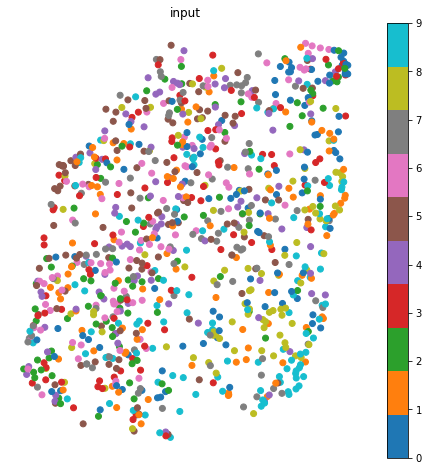

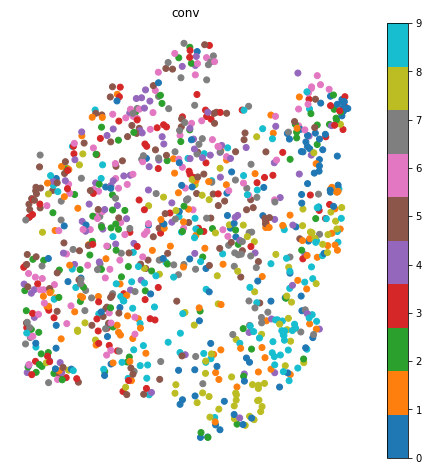

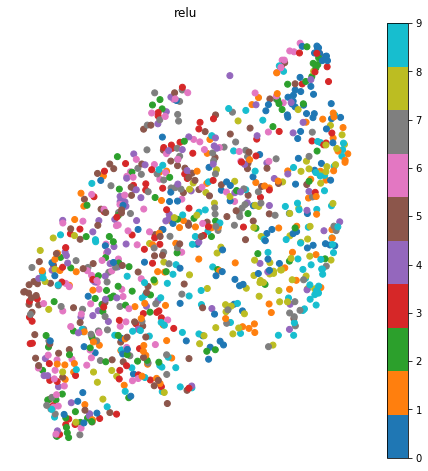

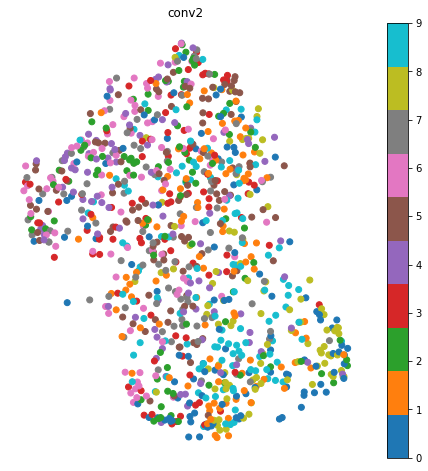

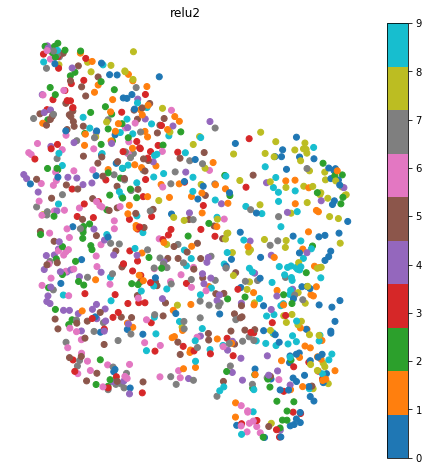

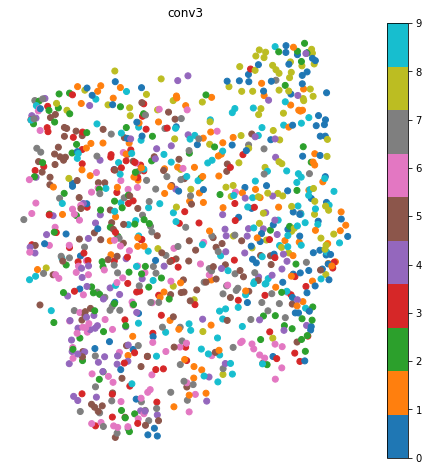

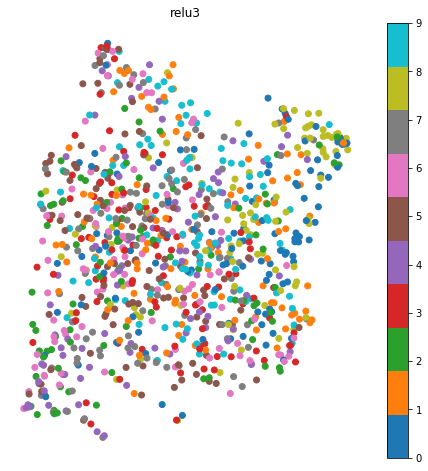

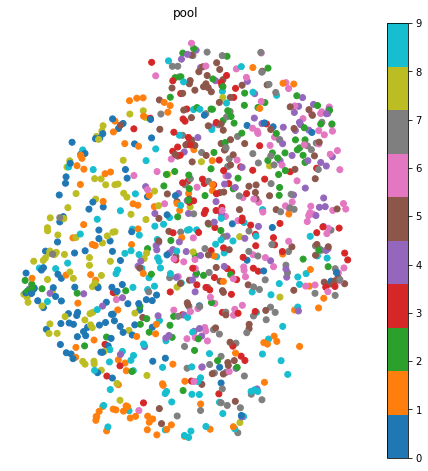

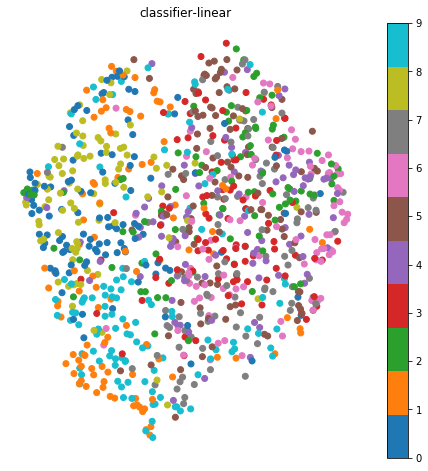

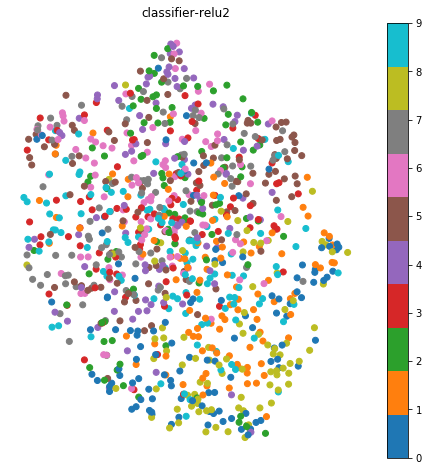

In [0]:
create_visualization(projection_by_layer, all_labels)

### Exercise

Now it's your turn! Build a convolutional neural network for CIFAR10, train and test it. Have fun!